In [443]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
from brian2.units import *
plt.viridis()
from matplotlib import animation, rc, colors
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [444]:
import matplotlib as mlib
mlib.rcParams.update({'font.size': 22})
mlib.rcParams.update({'errorbar.capsize': 5})

In [489]:
# Case 1
# data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/mnist_topographic_map_results_144234_23012018.npz") # inh lat f_rew = 1khz
# data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/mnist_topographic_map_results_154256_23012018.npz") # f_mean = 10 = 1khz
# data = np.load("C:/Work/phD/synaptogenesis/mnist_case_1.npz") # f_mean = 10
# data = np.load("C:/Work/phD/synaptogenesis/mnist_case_1_5hz_cs_on_off_smax_96_sigma_lat_2.npz")


# data = np.load("C:/Work/phD/synaptogenesis/mnist_case_1_5hz_cs_on_off.npz") 
# data = np.load("C:/Work/phD/synaptogenesis/mnist_case_1_5hz_cs_on_off_ffsigma.npz")
# data = np.load("C:/Work/phD/synaptogenesis/mnist_case_1_5hz_cs_on_off_2_sigma_lat.npz") 
# data = np.load("C:/Work/phD/synaptogenesis/mnist_case_1_5hz_cs_rand.npz") 
# data = np.load("C:/Work/phD/synaptogenesis/mnist_case_1_5hz_cs_on_off.npz") 

# Case 2
# data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/case_2_mnist_training.npz")
data = np.load("C:/Work/phD/synaptogenesis/mnist_case_2_5hz_cs_on_off_smax_96.npz")
# Case 3
# data = np.load("C:/Work/phd/synaptogenesis/case_3_mnist.npz")
# data = np.load("C:/Work/phd/synaptogenesis/mnist_case_3_5hz.npz")

# data = np.load("C:/Work/phd/synaptogenesis/mnist_case_3_5hz_cs.npz")
# data = np.load("C:/Work/phD/synaptogenesis/mnist_case_3_5hz_cs_on_off.npz")
# data = np.load("C:/Work/phD/synaptogenesis/mnist_case_3_5hz_cs_on_off_smax_64.npz")
# data = np.load("C:/Work/phD/synaptogenesis/mnist_case_3_5hz_cs_on_off_smax_96.npz")
# data = np.load("C:/Work/phD/synaptogenesis/mnist_case_3_5hz_cs_on_off_smax_96_sigma_lat_2.npz")


    
simtime = data['simtime'].ravel()[0]
from pprint import pprint as pp
pp(data['sim_params'].ravel()[0])
post_spikes = data['post_spikes']

{'a_minus': 0.12,
 'a_plus': 0.1,
 'b': 1.2,
 'case': 2,
 'cell_params': {'cm': 20.0,
                 'e_rev_E': 0.0,
                 'e_rev_I': -80.0,
                 'i_offset': 0.0,
                 'tau_m': 20.0,
                 'tau_refrac': 5.0,
                 'tau_syn_E': 5.0,
                 'tau_syn_I': 15.0,
                 'v_reset': -70.0,
                 'v_rest': -70.0,
                 'v_thresh': -50.0},
 'delay': 1,
 'f_base': 5,
 'f_mean': 5.0,
 'f_peak': 60,
 'f_rew': 10000,
 'g_max': 0.1,
 'grid': array([28, 28], dtype=int64),
 'input_type': 1,
 'lateral_inhibition': 1,
 'lesion': 0,
 'p_elim_dep': 0.0245,
 'p_elim_pot': 0.00013600000000000003,
 'p_form_forward': 0.16,
 'p_form_lateral': 1,
 'random_partner': False,
 's_max': 96,
 'sigma_form_forward': 2.5,
 'sigma_form_lateral': 1,
 'sigma_stim': 2,
 'simtime': 300000,
 't_minus': 20.0,
 't_plus': 20.0,
 't_record': 300000,
 't_stim': 200,
 'tau_refrac': 5.0}


In [490]:
#data.close()
data.files

['final_pre_on_weights',
 'sim_params',
 'init_lat_connections',
 'post_spikes',
 'simtime',
 'random_input',
 'pre_on_spikes',
 'lat_connections',
 'init_ff_off_connections',
 'ff_on_connections',
 'testing_numbers',
 'testing_file',
 'ff_off_connections',
 'init_ff_on_connections',
 'exception',
 'total_time',
 'final_post_weights',
 'pre_off_spikes',
 'final_pre_off_weights']

In [491]:
print data['random_input']

False


In [447]:
final_ff_on_conn = data['ff_on_connections'][-10:]
final_ff_off_conn = data['ff_off_connections'][-10:]
final_lat_conn = data['lat_connections'][-10:]
print final_ff_on_conn.shape
print final_ff_off_conn.shape
print final_lat_conn.shape

(10L,)
(10L,)
(0L,)


In [448]:
post_spikes[1].shape

(5907414L, 2L)

In [449]:
rates_for_number = np.zeros((10, 28**2))

for number in range(10):
    for neuron_id in range(28**2):
        rates_for_number[number, neuron_id] = np.count_nonzero(
            post_spikes[number][:, 0] == neuron_id)

[ 16455.] [ 462.]


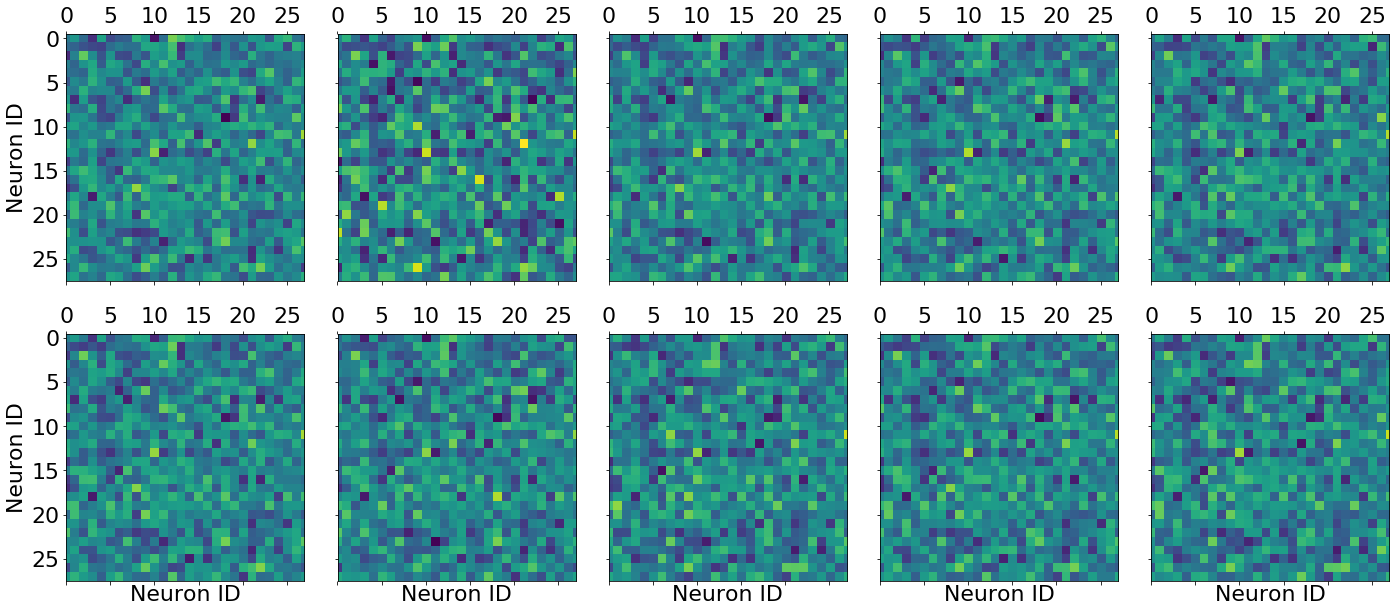

In [450]:
fig_conn, axes = plt.subplots(2, 5,figsize=(20, 9), dpi=800, sharey=True)

silly_ax = []
maximus = [-1]
minimus = [2**31]

for index, val in np.ndenumerate(axes):
    x, y = index
    source_weighted_hits = rates_for_number[x*5+y, :].reshape(28, 28)
    maximus = np.maximum(maximus, source_weighted_hits.max())
    minimus = np.minimum(minimus, source_weighted_hits.min())

    silly_ax.append(axes[x, y].matshow(source_weighted_hits))

# ff_conn_ax = axes[0, 0].matshow(source_hits.reshape(28, 28))
# weighted_conn_ax = axes[1, 1].matshow(source_weighted_hits.reshape(28, 28))
print maximus, minimus

# ax1.set_title("Hits\n")
# ax1.set_xlabel("Neuron ID")
axes[0, 0].set_ylabel("Neuron ID")
# ax2.set_title("Weighted hits\n")
# ax2.set_xlabel("Neuron ID")
axes[1, 0].set_ylabel("Neuron ID")

for arg in range(5):
    axes[1, arg].set_xlabel("Neuron ID")
    

# fig_conn.subplots_adjust(right=0.8)
# cbar_ax = fig_conn.add_axes([0.85, 0.15, 0.05, 0.7])
# fig_conn.colorbar(silly_ax[4], cax=cbar_ax)

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# plt.colorbar(silly_ax[4], cax=cax)
norm = colors.Normalize(vmin=minimus, vmax=maximus)
for index, val in np.ndenumerate(axes):
    x, y = index
    silly_ax[x*5+y].set_norm(norm)
plt.tight_layout()
plt.savefig("total_target_hits.png", dpi=800)
# plt.savefig("total_target_hits.eps", dpi=800)
plt.show()

In [451]:
final_ff_on_conn[0].shape

(61338L, 4L)

In [452]:
conn_list = final_ff_on_conn[6]

In [453]:
source_hits = np.empty(28**2)
source_weighted_hits = np.empty(28**2)
for i in range(28**2):
    source_hits[i] = np.count_nonzero(conn_list[:, 0]==i)
#     print conn_list[conn_list[:, 0]==i]
    source_weighted_hits[i] = np.sum(conn_list[conn_list[:, 0]==i, 2])

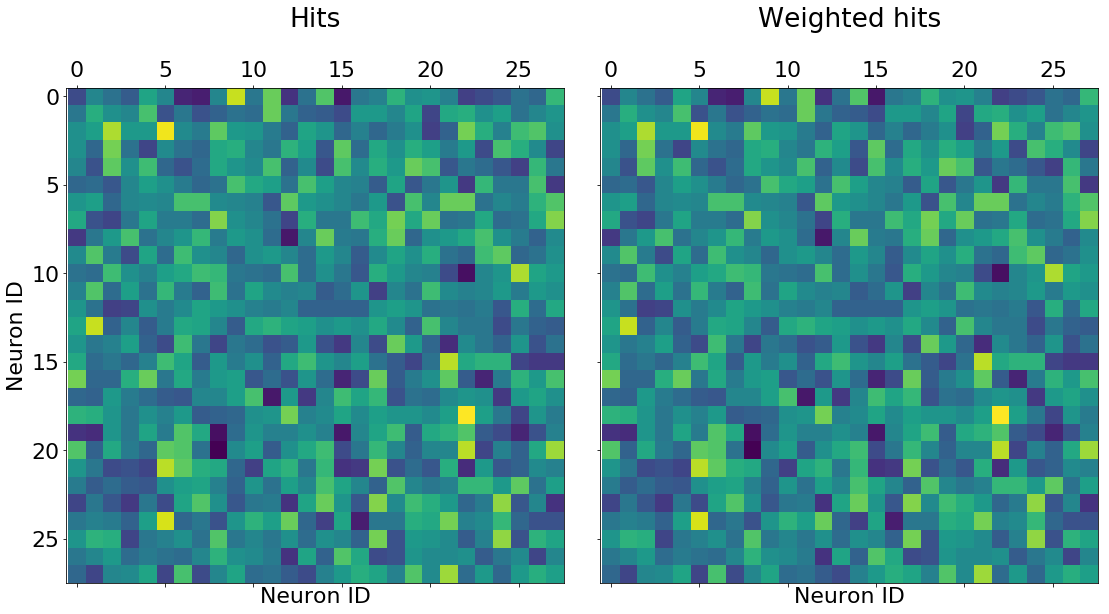

In [454]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,9), dpi=800, sharey=True)
    

ff_conn_ax = ax1.matshow(source_hits.reshape(28, 28))
weighted_conn_ax = ax2.matshow(source_weighted_hits.reshape(28, 28))

ax1.set_title("Hits\n")
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
ax2.set_title("Weighted hits\n")
ax2.set_xlabel("Neuron ID")
# ax2.set_ylabel("Neuron ID")

plt.tight_layout()

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)
# cbar.set_label("Number of hits", fontsize=14)
plt.show()

[ 20.71875] [ 11.15625]


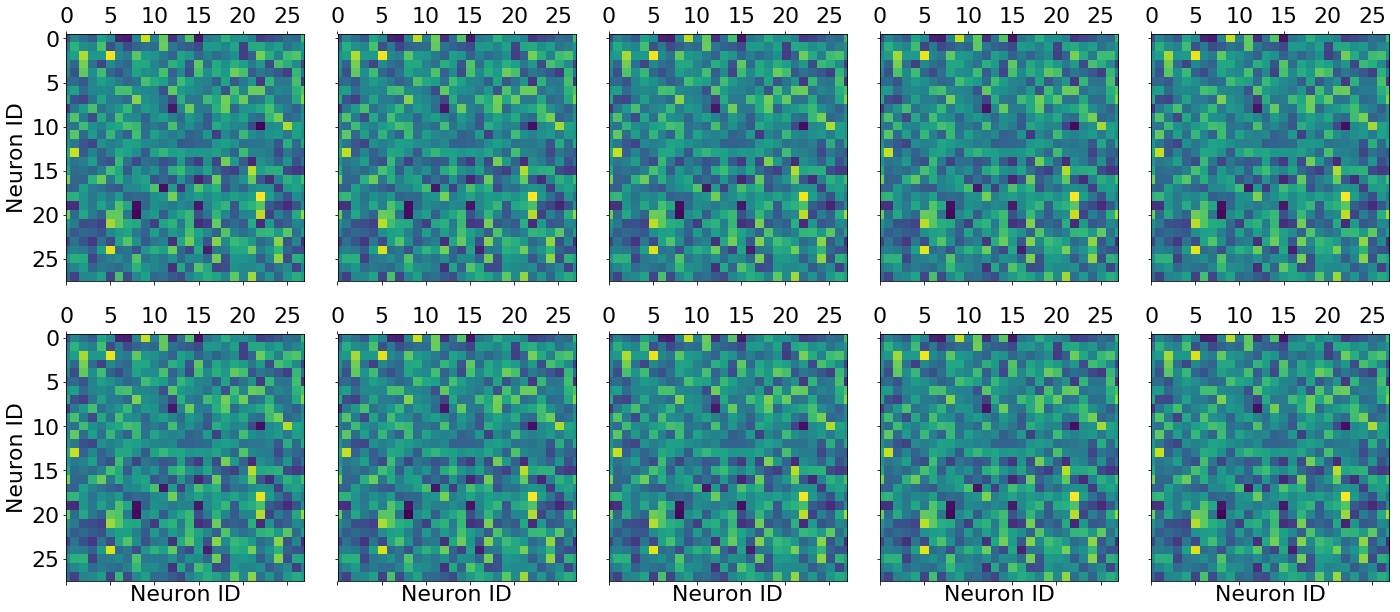

In [455]:
fig_conn, axes = plt.subplots(2, 5,figsize=(20, 9), dpi=800, sharey=True)

silly_ax = []
maximus = [-1]
minimus = [2**31]

for index, val in np.ndenumerate(axes):
    x, y = index
    source_weighted_hits = np.zeros(28**2)
    conn_list = final_ff_on_conn[x*5+y]
    for i in range(28**2):
        source_weighted_hits[i] = np.sum(conn_list[conn_list[:, 0]==i, 2])
    conn_list = final_ff_off_conn[x*5+y]
    for i in range(28**2):
        source_weighted_hits[i] += np.sum(conn_list[conn_list[:, 0]==i, 2])
    maximus = np.maximum(maximus, source_weighted_hits.max())
    minimus = np.minimum(minimus, source_weighted_hits.min())

    silly_ax.append(axes[x, y].matshow(source_weighted_hits.reshape(28, 28)))

# ff_conn_ax = axes[0, 0].matshow(source_hits.reshape(28, 28))
# weighted_conn_ax = axes[1, 1].matshow(source_weighted_hits.reshape(28, 28))
print maximus, minimus

# ax1.set_title("Hits\n")
# ax1.set_xlabel("Neuron ID")
axes[0, 0].set_ylabel("Neuron ID")
# ax2.set_title("Weighted hits\n")
# ax2.set_xlabel("Neuron ID")
axes[1, 0].set_ylabel("Neuron ID")

for arg in range(5):
    axes[1, arg].set_xlabel("Neuron ID")
    
norm = colors.Normalize(vmin=minimus, vmax=maximus)
for index, val in np.ndenumerate(axes):
    x, y = index
    silly_ax[x*5+y].set_norm(norm)
# fig_conn.subplots_adjust(right=0.8)
# cbar_ax = fig_conn.add_axes([0.85, 0.15, 0.05, 0.7])
# fig_conn.colorbar(silly_ax[4], cax=cbar_ax)

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# plt.colorbar(silly_ax[4], cax=cax)

plt.tight_layout()
plt.savefig("all_digits_weighted.png", dpi=800)
# plt.savefig("all_digits_weighted.eps", dpi=800)
plt.show()

[ 208.] [ 112.]


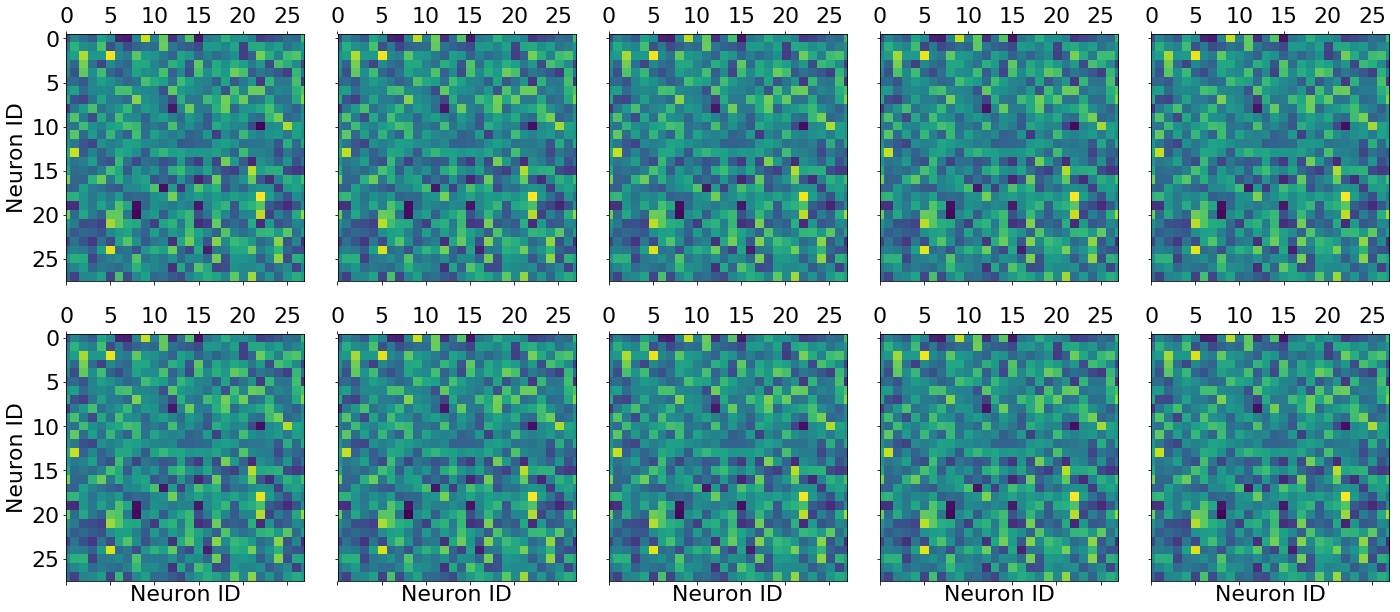

In [456]:
fig_conn, axes = plt.subplots(2, 5,figsize=(20, 9), dpi=800, sharey=True)

silly_ax = []
maximus = [-1]
minimus = [2**31]

for index, val in np.ndenumerate(axes):
    x, y = index
    source_hits = np.zeros(28**2)
    conn_list = final_ff_on_conn[x*5+y]
    for i in range(28**2):
        source_hits[i] += np.count_nonzero(conn_list[:, 0]==i)
    conn_list = final_ff_off_conn[x*5+y]
    for i in range(28**2):
        source_hits[i] += np.count_nonzero(conn_list[:, 0]==i)
    maximus = np.maximum(maximus, source_hits.max())
    minimus = np.minimum(minimus, source_hits.min())

    silly_ax.append(axes[x, y].matshow(source_hits.reshape(28, 28)))

# ff_conn_ax = axes[0, 0].matshow(source_hits.reshape(28, 28))
# weighted_conn_ax = axes[1, 1].matshow(source_weighted_hits.reshape(28, 28))
print maximus, minimus

# ax1.set_title("Hits\n")
# ax1.set_xlabel("Neuron ID")
axes[0, 0].set_ylabel("Neuron ID")
# ax2.set_title("Weighted hits\n")
# ax2.set_xlabel("Neuron ID")
axes[1, 0].set_ylabel("Neuron ID")

for arg in range(5):
    axes[1, arg].set_xlabel("Neuron ID")
    
norm = colors.Normalize(vmin=minimus, vmax=maximus)
for index, val in np.ndenumerate(axes):
    x, y = index
    silly_ax[x*5+y].set_norm(norm)
# fig_conn.subplots_adjust(right=0.8)
# cbar_ax = fig_conn.add_axes([0.85, 0.15, 0.05, 0.7])
# fig_conn.colorbar(silly_ax[4], cax=cbar_ax)

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# plt.colorbar(silly_ax[4], cax=cax)

plt.tight_layout()
plt.savefig("all_digits.png", dpi=800)
# plt.savefig("all_digits.eps", dpi=800)
plt.show()

In [457]:
centre_location = int(28**2 / 2.) + 14
side_centre_location = 28 * 14
print "centre location ", centre_location
print "side centre location ", side_centre_location

centre location  406
side centre location  392


In [458]:
fan_in_on_for_good = final_ff_on_conn[1]
centre_on_pres = fan_in_on_for_good[fan_in_on_for_good[:, 1] == centre_location]
side_centre_on_pres = fan_in_on_for_good[fan_in_on_for_good[:, 1] == side_centre_location]


fan_in_off_for_good = final_ff_off_conn[1]
centre_off_pres = fan_in_off_for_good[fan_in_off_for_good[:, 1] == centre_location]
side_centre_off_pres = fan_in_off_for_good[fan_in_off_for_good[:, 1] == side_centre_location]

In [459]:
centre_fan_in = np.zeros(28**2)
side_centre_fan_in = np.zeros(28**2)
for x in centre_on_pres[:,0]:
    centre_fan_in[int(x)]+=1 
for x in centre_off_pres[:,0]:
    centre_fan_in[int(x)]+=1 
    
for x in side_centre_on_pres[:,0]:
    side_centre_fan_in[int(x)]+=1 
for x in side_centre_off_pres[:,0]:
    side_centre_fan_in[int(x)]+=1 

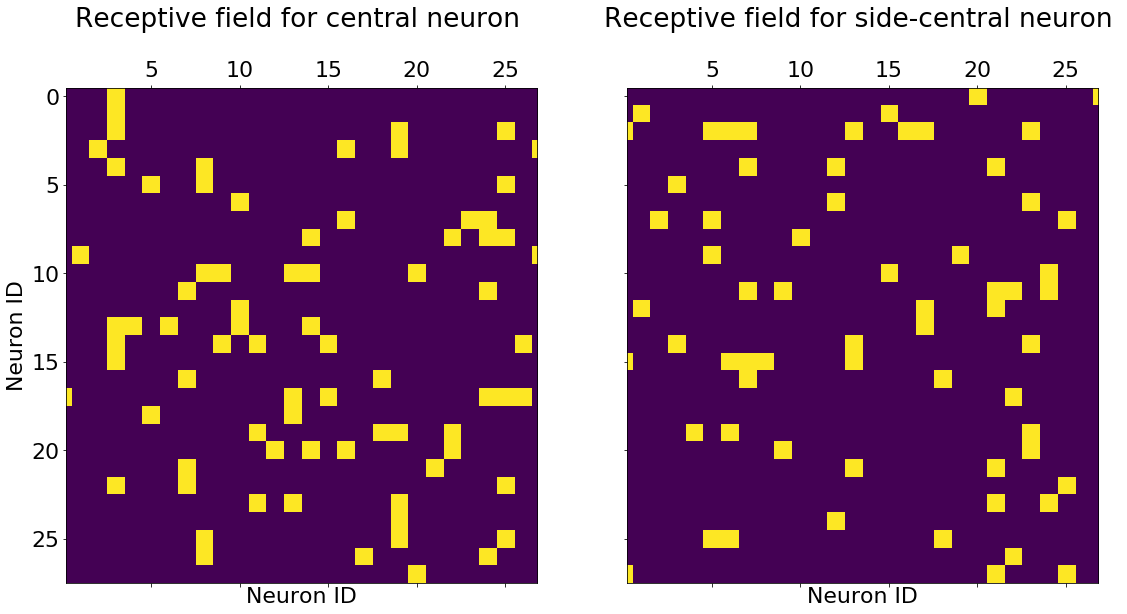

In [460]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16.5,9), dpi=800, sharey=True)
    

    
ff_conn_ax = ax1.matshow(centre_fan_in.reshape(28,28))
weighted_conn_ax = ax2.matshow(side_centre_fan_in.reshape(28,28))

ax1.set_title("Receptive field for central neuron \n")
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
ax2.set_title("Receptive field for side-central neuron \n")
ax2.set_xlabel("Neuron ID")
# ax2.set_ylabel("Neuron ID")

plt.tight_layout()

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)
# cbar.set_label("Number of hits", fontsize=14)
plt.savefig("centre_neuron_receptive_field_cs.png", dpi=600)
plt.show()

In [461]:
data.close()

In [462]:
# testing_data = np.load("C:/Work/phd/synaptogenesis/case_3_mnist_testing.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_1.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_5hz.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_5hz_cs.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_1_5hz_cs_on_off.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_1_5hz_cs_on_off_ffsigma.npz")
# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_1_5hz_cs_on_off_2_sigma_lat.npz")
 
testing_data = np.load("C:/Work/phD/synaptogenesis/testing_mnist_case_2_5hz_cs_on_off_smax_96.npz") 

# testing_data = np.load("C:/Work/phD/synaptogenesis/testing_mnist_case_1_5hz_cs_rand.npz") 
# testing_data = np.load("C:/Work/phD/synaptogenesis/testing_mnist_case_3_5hz_cs_on_off_smax_64.npz") 
# testing_data = np.load("C:/Work/phD/synaptogenesis/testing_mnist_case_3_5hz_cs_on_off_smax_96.npz") 
# testing_data = np.load("C:/Work/phD/synaptogenesis/testing_mnist_case_1_5hz_cs_on_off_smax_96_sigma_lat_2.npz")

# testing_data = np.load("C:/Work/phD/synaptogenesis/testing_mnist_case_3_5hz_cs_on_off_smax_96_sigma_lat_2.npz") 

# testing_data = np.load("C:/Work/phd/synaptogenesis/testing_mnist_case_3_5hz_cs_on_off.npz")


In [463]:
# testing_data.close()

In [464]:
print testing_data['testing_numbers']

[5 0 0 ..., 4 2 7]


In [465]:
testing_numbers = testing_data['testing_numbers']

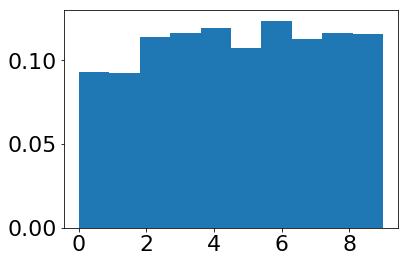

In [466]:
plt.hist(testing_data['testing_numbers'], normed=1)
plt.show()

In [467]:
post_spikes = testing_data['post_spikes']

In [468]:
assert post_spikes.shape[0] == 10

[ 16455.] [ 462.]


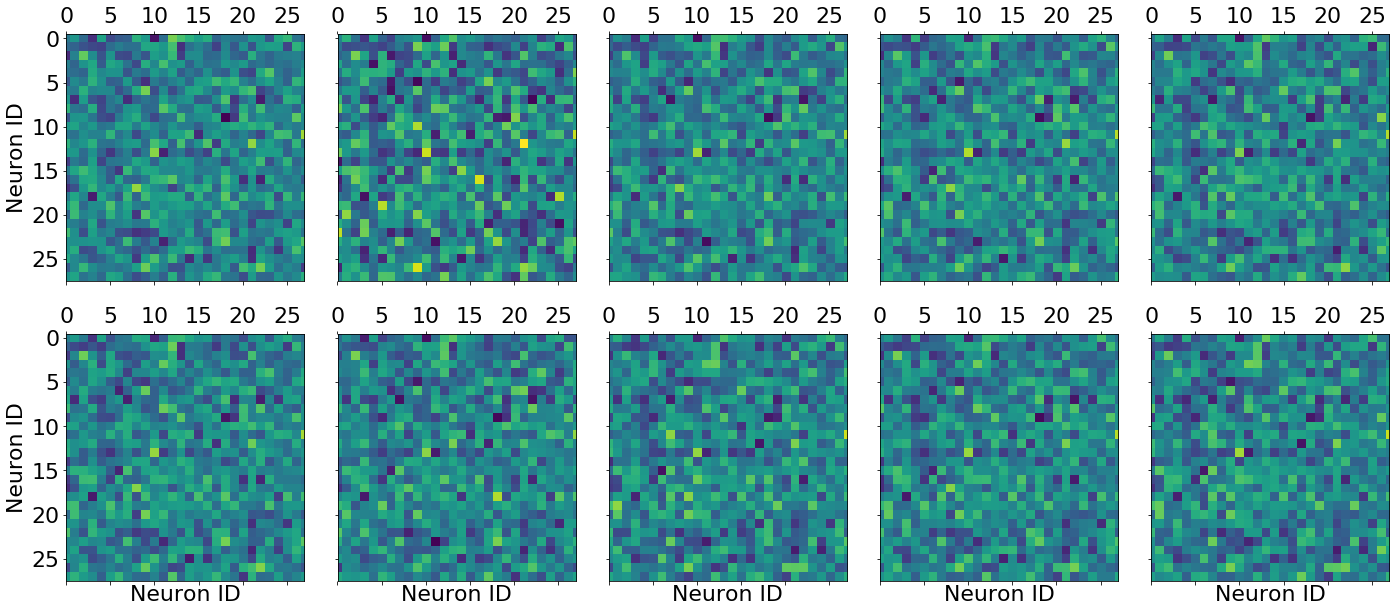

In [469]:
fig_conn, axes = plt.subplots(2, 5,figsize=(20, 9), dpi=800, sharey=True)

silly_ax = []
maximus = [-1]
minimus = [2**31]

for index, val in np.ndenumerate(axes):
    x, y = index
    source_weighted_hits = rates_for_number[x*5+y, :].reshape(28, 28)
    maximus = np.maximum(maximus, source_weighted_hits.max())
    minimus = np.minimum(minimus, source_weighted_hits.min())

    silly_ax.append(axes[x, y].matshow(source_weighted_hits))

# ff_conn_ax = axes[0, 0].matshow(source_hits.reshape(28, 28))
# weighted_conn_ax = axes[1, 1].matshow(source_weighted_hits.reshape(28, 28))
print maximus, minimus

# ax1.set_title("Hits\n")
# ax1.set_xlabel("Neuron ID")
axes[0, 0].set_ylabel("Neuron ID")
# ax2.set_title("Weighted hits\n")
# ax2.set_xlabel("Neuron ID")
axes[1, 0].set_ylabel("Neuron ID")

for arg in range(5):
    axes[1, arg].set_xlabel("Neuron ID")
    
norm = colors.Normalize(vmin=minimus, vmax=maximus)
for index, val in np.ndenumerate(axes):
    x, y = index
    silly_ax[x*5+y].set_norm(norm)
# fig_conn.subplots_adjust(right=0.8)
# cbar_ax = fig_conn.add_axes([0.85, 0.15, 0.05, 0.7])
# fig_conn.colorbar(silly_ax[4], cax=cbar_ax)

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# plt.colorbar(silly_ax[4], cax=cax)

plt.tight_layout()
plt.savefig("total_target_hits_cs_during_testing.png", dpi=800)
# plt.savefig("total_target_hits_rate_based.eps", dpi=800)
plt.show()

In [470]:
post_spikes_no_0 = post_spikes[0]
print post_spikes_no_0.shape[0] / (28**2 * 300 *second)

25.36219388 Hz


In [471]:
chunk = 200 
instaneous_rates = np.empty((10, 300000//chunk))

In [472]:
for index, value in np.ndenumerate(instaneous_rates):
    number_index, chunk_index = index
    instaneous_rates[number_index, chunk_index] = np.count_nonzero(
            np.logical_and(
                post_spikes[number_index][:, 1] >= (chunk_index * chunk), 
                post_spikes[number_index][:, 1] <= ((chunk_index+1) * chunk)
            )
        ) / (28**2 * chunk *ms)

In [473]:
instaneous_rates.shape

(10L, 1500L)

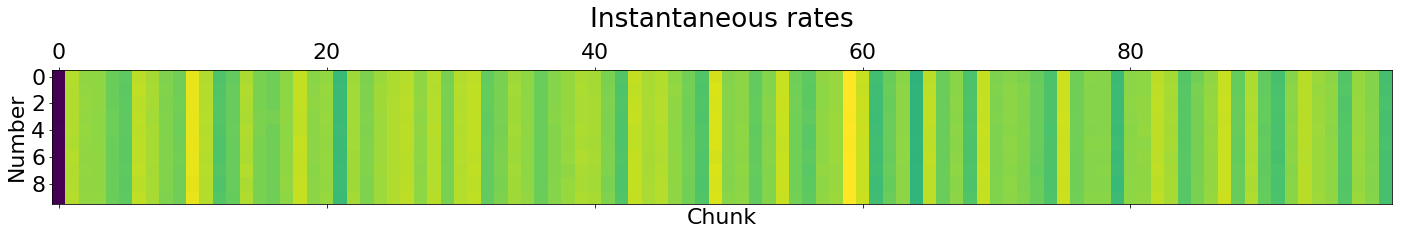

In [474]:
fig_conn, ax1 = plt.subplots(1, 1,figsize=(24,8), dpi=600)
    

ff_conn_ax = ax1.matshow(instaneous_rates[:, :100])

ax1.set_title("Instantaneous rates\n")
ax1.set_xlabel("Chunk")
ax1.set_ylabel("Number")

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(ff_conn_ax, cax=cax)
# cbar.set_label("Number of predictions")

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)
# cbar.set_label("Number of hits", fontsize=14)

plt.savefig("instaneous_rates.png", dpi=600)

In [475]:
what_network_thinks = np.empty(300000//chunk)
for i in range(what_network_thinks.shape[0]):
    what_network_thinks[i] = np.argmax(instaneous_rates[:, i])

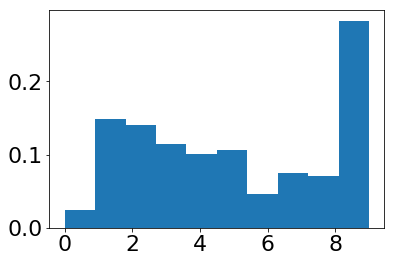

In [476]:
n, bins, patches = plt.hist(what_network_thinks, normed=1)
plt.show()

In [477]:
what_network_thinks

array([ 4.,  6.,  2., ...,  3.,  2.,  1.])

In [478]:
# sanity check
assert what_network_thinks.size == testing_data['testing_numbers'].size

In [479]:
confusion_matrix = np.zeros((10, 10))

In [480]:
for pair in zip(testing_data['testing_numbers'], what_network_thinks):
    confusion_matrix[pair[0], int(pair[1])] +=1

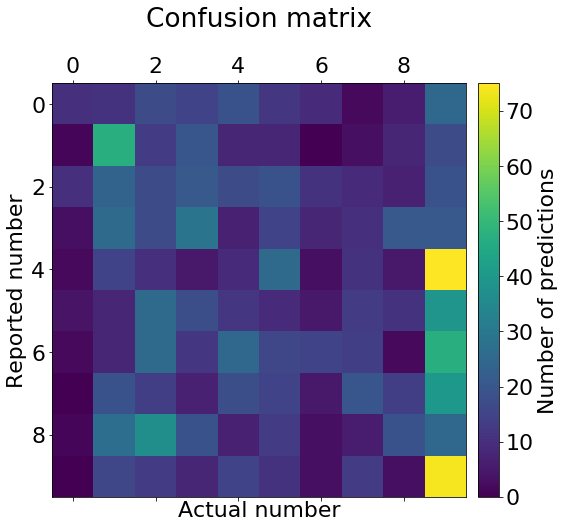

In [481]:
fig_conn, ax1 = plt.subplots(1, 1,figsize=(8,8), dpi=800)
    

ff_conn_ax = ax1.matshow(confusion_matrix)

ax1.set_title("Confusion matrix\n")
ax1.set_xlabel("Actual number")
ax1.set_ylabel("Reported number")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(ff_conn_ax, cax=cax)
cbar.set_label("Number of predictions")

# divider = make_axes_locatable(plt.gca())
# cax = divider.append_axes("right", "5%", pad="3%")
# cbar = plt.colorbar(i, cax=cax)
# cbar.set_label("Number of hits", fontsize=14)

plt.savefig("mnist_confusion_matrix.png", dpi=800)

In [482]:
accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
print accuracy
recall = np.trace(confusion_matrix) / np.sum(confusion_matrix)
print recall

0.166
0.166


In [483]:
from sklearn.metrics import classification_report

In [484]:
print classification_report(testing_data['testing_numbers'], what_network_thinks)

             precision    recall  f1-score   support

          0       0.30      0.08      0.13       126
          1       0.23      0.38      0.29       125
          2       0.09      0.11      0.10       154
          3       0.19      0.18      0.19       157
          4       0.07      0.06      0.06       161
          5       0.06      0.06      0.06       145
          6       0.24      0.09      0.13       167
          7       0.20      0.13      0.16       152
          8       0.20      0.12      0.15       157
          9       0.19      0.47      0.28       156

avg / total       0.17      0.17      0.15      1500



In [485]:
rmse = np.sqrt(np.mean((testing_data['testing_numbers'] - what_network_thinks)**2))

In [486]:
print "RMSE", rmse

RMSE 3.8077990143


In [487]:
testing_data.close()